## Receiver Operating Characteristic (ROC) Analysis
#### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other

classifiers = []
model1 = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
classifiers.append(model1)

model2 = OneVsRestClassifier(svm.SVC(kernel='rbf', gamma ='scale', probability=True, random_state=random_state))
classifiers.append(model2)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classifiers)):
    y_score = classifiers[i].fit(X_train, y_train).decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    for j in range(n_classes):
        setName='mdl' + str(i) + '_class' + str(j)
        print('Calculating ROC for: ' + setName)
        
        fpr[setName], tpr[setName], _ = roc_curve(y_test[:, j], y_score[:, j])
        roc_auc[setName] = auc(fpr[setName], tpr[setName])

    # Compute micro-average ROC curve and ROC area
    setName='mdl' + str(i) + '_classMicro'
    print('Calculating ROC for: ' + setName)
    fpr[setName], tpr[setName], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc[setName] = auc(fpr[setName], tpr[setName])

Automatically created module for IPython interactive environment
Calculating ROC for: mdl0_class0
Calculating ROC for: mdl0_class1
Calculating ROC for: mdl0_class2
Calculating ROC for: mdl0_classMicro
Calculating ROC for: mdl1_class0
Calculating ROC for: mdl1_class1
Calculating ROC for: mdl1_class2
Calculating ROC for: mdl1_classMicro


In [4]:
fpr.keys()

dict_keys(['mdl0_class0', 'mdl0_class1', 'mdl0_class2', 'mdl0_classMicro', 'mdl1_class0', 'mdl1_class1', 'mdl1_class2', 'mdl1_classMicro'])

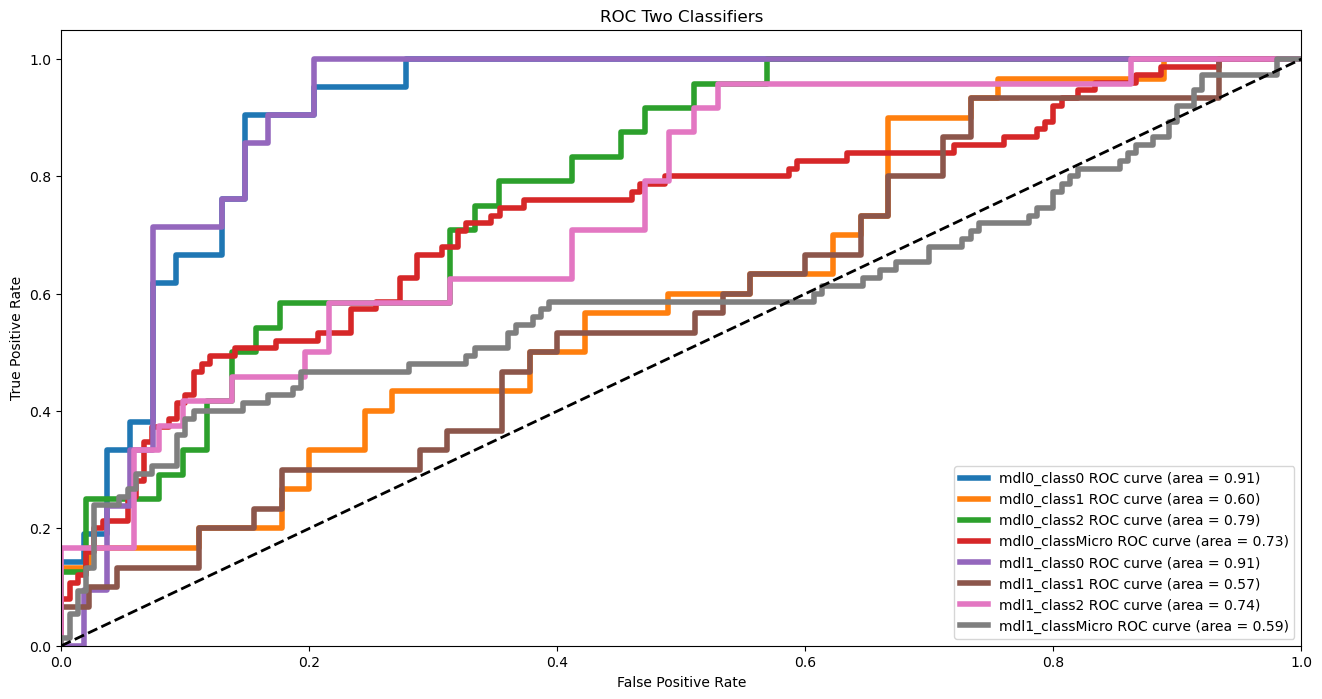

In [6]:
plt.figure(figsize=[16, 8])
lw = 2

# Plot all ROC curves
#colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, tmpSet in enumerate(fpr.keys()):
#    plt.plot(fpr[tmpSet], tpr[tmpSet], label=tmpSet + ' ROC curve (area = {0:0.2f})'''.format(roc_auc[tmpSet]), color=colors[i], linestyle=':', linewidth=4)
    plt.plot(fpr[tmpSet], tpr[tmpSet], label=tmpSet + ' ROC curve (area = {0:0.2f})'''.format(roc_auc[tmpSet]), linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Two Classifiers')
plt.legend(loc="lower right")
plt.show()
